#### Classification  algorithms

In [2]:
from warnings  import  filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as  np
import  seaborn as  sns
import  matplotlib.pyplot as plt

In [4]:
df  = pd.read_csv(r"C:\Users\admin\Downloads\train_loan.csv")

#### Basic checks

In [5]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [7]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [11]:
# drop id
df.drop('id' ,  axis  = 1 , inplace  =  True)

In [12]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

# seperate x and  y

In [13]:
x  =  df.drop('loan_status' , axis = 1)
y  = df['loan_status']

### seperate categorical and numerical  data

In [14]:
cat  =  x.columns[x.dtypes  == 'object']
num  =  x.columns[x.dtypes  != 'object']

In [17]:
df[cat].value_counts()

person_home_ownership  loan_intent      loan_grade  cb_person_default_on_file
RENT                   MEDICAL          B           N                            2577
                       EDUCATION        B           N                            2395
MORTGAGE               EDUCATION        A           N                            2300
                       PERSONAL         A           N                            2169
                       VENTURE          A           N                            1992
                                                                                 ... 
RENT                   HOMEIMPROVEMENT  A           Y                               1
                                        G           Y                               1
                       MEDICAL          B           Y                               1
                       PERSONAL         A           Y                               1
                       VENTURE          A           Y         

### Create  pipeline

In [16]:
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing  import  OneHotEncoder  ,  StandardScaler
from sklearn.compose  import  ColumnTransformer
from sklearn.impute  import SimpleImputer

In [19]:
cat_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'most_frequent')), 
                                 ('encoder' ,  OneHotEncoder(handle_unknown  =  'ignore'))])
num_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean')) ,  ('scaler' ,  StandardScaler())])                                  

In [25]:
x.shape

(58645, 11)

In [20]:
pre =  ColumnTransformer([('num' ,  num_pipeline  ,  num) , 
                   ('cat' ,  cat_pipeline ,  cat)])

In [27]:
x_scaled  = pre.fit_transform(x)

In [28]:
x_scaled

array([[ 1.56620019, -0.7657678 , -1.18719967, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.21212778,  0.32804728, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2401962 , -0.92922343,  0.8331296 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.75430679, -0.52849351,  0.58058844, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.89758686, -0.68211735, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5716972 ,  0.28878463, -0.68211735, ...,  0.        ,
         1.        ,  0.        ]], shape=(58645, 26))

In [29]:
len(x_scaled)

58645

In [31]:
len(pre.get_feature_names_out())

26

In [34]:
x_scaled  = pd.DataFrame(x_scaled  , 
columns  =  pre.get_feature_names_out() )

In [36]:
x_scaled.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### seperate training and  testing

In [37]:
from sklearn.model_selection  import train_test_split

In [40]:
x_train ,  x_test  ,  y_train  ,  y_test  =  train_test_split(x_scaled  , y , test_size  =  0.25 ,  random_state  =  3)

In [41]:
print(x_train.shape  , y_train.shape)
print(x_test.shape  , y_test.shape)

(43983, 26) (43983,)
(14662, 26) (14662,)


In [42]:
y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [43]:
y_train.value_counts()

loan_status
0    37688
1     6295
Name: count, dtype: int64

In [44]:
y_test.value_counts()

loan_status
0    12607
1     2055
Name: count, dtype: int64

#### model  fitting

In [45]:
from  sklearn.linear_model import LogisticRegression

In [46]:
LR =  LogisticRegression()

In [47]:
LR.fit(x_train  , y_train  )

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
LR.score(x_train ,  y_train)

0.9114885296591865

In [49]:
LR.score(x_test ,  y_test)

0.9134497340062747

##### model evaluation

In [52]:
from sklearn.metrics  import classification_report, confusion_matrix

In [55]:
train_pred  =  LR.predict(x_train)
print(classification_report(y_train  , train_pred ))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     37688
           1       0.78      0.53      0.63      6295

    accuracy                           0.91     43983
   macro avg       0.85      0.75      0.79     43983
weighted avg       0.90      0.91      0.90     43983



In [66]:
cf  =   confusion_matrix( y_train , train_pred  )

<Axes: >

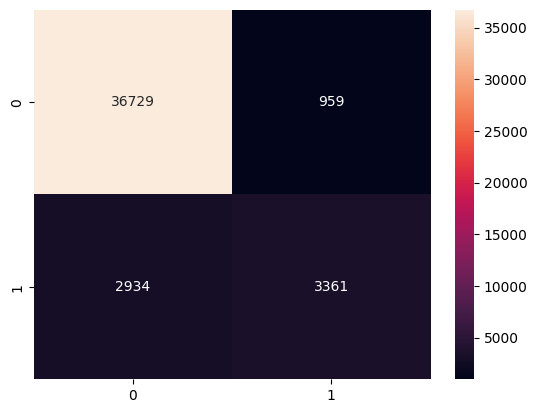

In [67]:
sns.heatmap(cf , annot  =  True  ,  fmt  =  'd')

In [63]:
3361+2934

6295

In [62]:
y_train.value_counts()

loan_status
0    37688
1     6295
Name: count, dtype: int64

#### USE OVERSAMPLING

In [69]:
from imblearn.over_sampling  import SMOTE

In [59]:
%pip  install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-l

In [72]:
smote  = SMOTE( random_state = 34)
x_resample  ,  y_resample  =  smote.fit_resample(x_scaled  ,  y)

In [73]:
y_resample.value_counts()

loan_status
0    50295
1    50295
Name: count, dtype: int64

In [74]:
LR1  =  LogisticRegression()